# **Trabalho de Conclusão de Curso - PUC-Minas**
Aluno: Marco Antônio Ferreira Duran

**Um estudo de averiguação cadastral do Benefício de Prestação Continuada**



# Importação a análise e exploração dos dados


**Importação do dataset**


In [ ]:
!pip install pyod

In [2]:
# importação de bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

**Lendo arquivo de BPC**

In [ ]:
bpc = pd.read_csv("sample_data/bpc_mov_trab6.csv")
bpc.shape
bpc.dtypes

**Primeitas Informações Estatísticas do BPC**

In [63]:
bpc.describe()

,numbenef,idade,total_mov
count,1.383400e+04,13834.000000,1.383400e+04
mean,5.219463e+09,74.709628,2.807375e+04
std,2.222086e+09,6.033992,1.537188e+05
min,1.001490e+09,65.000000,1.000000e-02
25%,5.140488e+09,70.000000,5.988000e+03
50%,5.518219e+09,73.000000,1.223006e+04
75%,7.024545e+09,78.000000,2.498664e+04
max,7.045553e+09,103.000000,8.445250e+06


**Boxplot Idade**

In [ ]:
rcParams['figure.figsize'] = 6,6
ax = sns.boxplot(y=bpc['idade'])
ax.set_ylabel('Idade')
ax.title.set_text('Boxplot: Variável Idade')
ax.figure.savefig('sample_data/boxplot_idade.png')

**Histograma Idade**

In [ ]:
rcParams['figure.figsize'] = 6,6
ax = sns.histplot(x=bpc['idade'])
ax.set_ylabel('Qtd Beneficiários')
ax.set_xlabel('Idade')
ax.title.set_text('Histograma: Variável Idade')
ax.figure.savefig('sample_data/hist_idade.png')


**Boxplot Movimentação Total**

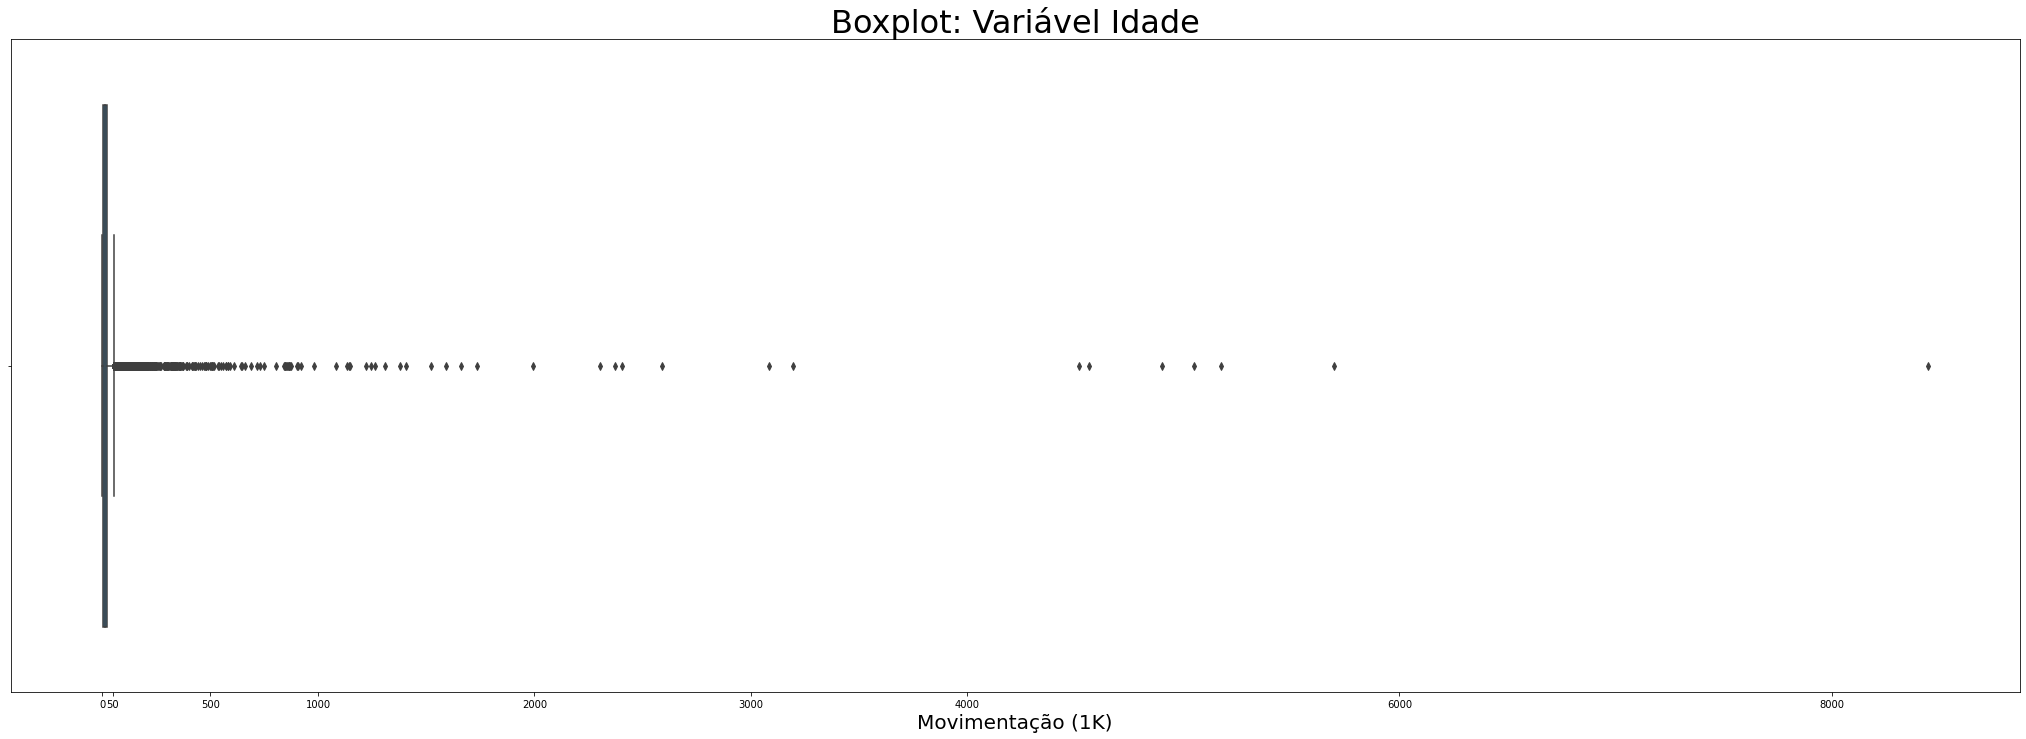

In [21]:
rcParams['figure.figsize'] = 36,12
rcParams['axes.titlesize'] = 32
plt.xticks([0, 50, 500,  1000, 2000, 3000, 4000, 6000, 8000])
ax = sns.boxplot(x=bpc['total_mov']/1000)
ax.set_xlabel('Movimentação (1K)',fontsize=20)
ax.title.set_text('Boxplot: Variável Idade')
ax.figure.savefig('sample_data/boxplot_total_mov.png')

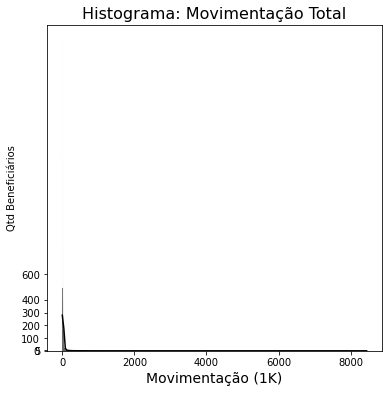

In [146]:
# Histograma de total_mov
rcParams['figure.figsize'] = 6,6
rcParams['axes.titlesize'] = 16
plt.yticks([0, 5, 100,  200, 300, 400, 600])
ax = sns.histplot(x=bpc['total_mov']/1000,color='black',kde=True)
ax.set_ylabel('Qtd Beneficiários')
ax.set_xlabel('Movimentação (1K)', fontsize=14)
ax.title.set_text('Histograma: Movimentação Total')
ax.figure.savefig('sample_data/hist_total_mov_geral.png')

**Limites dos Histogramas de Movimentação**

In [89]:
# Cálculo dos limites constrúidos para plotar os histogramas de movimentação
quartil_1 = bpc.quantile(q=0.25)
quartil_2 = bpc.quantile(q=0.50)
quartil_3 = bpc.quantile(q=0.75)
limite_superior = quartil_3['total_mov'] + 1.5 * (quartil_3['total_mov'] - quartil_1['total_mov'])
q1_s = str(quartil_1['total_mov'])
q2_s = str(quartil_2['total_mov'])
q3_s = str(quartil_3['total_mov'])
limsup_s = str(limite_superior)
bpcmaximo = bpc['total_mov'].max()
print('Histograma 1 - valor da movimentação máximo: R$', q2_s)
print('Histograma 2 - 1o Quartil: R$', q1_s)
print('Histograma 2 - 3o Quartil: R$', q3_s)
print('Histograma 2 - valor da movimentação máximo: R$', limsup_s)
print('Histograma 3 - máximo: R$', format(bpcmaximo, '.2f'))

Histograma 1 - valor da movimentação máximo: R$ 12230.055
Histograma 2 - 1o Quartil: R$ 5988.0
Histograma 2 - 3o Quartil: R$ 24986.64
Histograma 2 - valor da movimentação máximo: R$ 53484.6
Histograma 3 - máximo: R$ 8445249.80


**Histograma 1**

Número de registros:  6917


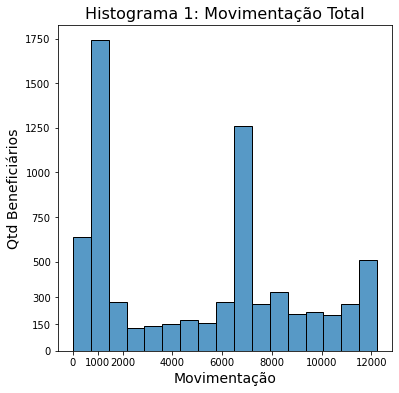

In [140]:
# Histograma do segundo quartil
quartil_2 = bpc.quantile(q=0.50)
q2_s = str(quartil_2['total_mov'])
filtro_query = 'total_mov <= ' + q2_s
mov_quartil_2 = bpc.query(filtro_query)['total_mov']
print('Número de registros: ', mov_quartil_2.shape[0])
rcParams['figure.figsize'] = 6,6
rcParams['axes.titlesize'] = 16
plt.xticks([0, 1000, 2000, 4000, 6000, 8000, 10000, 12000])
plt.yticks([0, 150, 300, 500, 750, 1000, 1250, 1500, 1750])
ax = sns.histplot(x=mov_quartil_2)
ax.set_ylabel('Qtd Beneficiários', fontsize=14)
ax.set_xlabel('Movimentação', fontsize=14)
ax.title.set_text('Histograma 1: Movimentação Total')
ax.figure.savefig('sample_data/hist_total_mov_quartil2.png')

**Histograma 2**

In [136]:
# Histograma do segundo quartil
# Cálculo do limite superior da movimentação
quartil_1 = bpc.quantile(q=0.25)
quartil_2 = bpc.quantile(q=0.50)
quartil_3 = bpc.quantile(q=0.75)
limite_superior = quartil_3['total_mov'] + 1.5 * (quartil_3['total_mov'] - quartil_1['total_mov'])
print('Limite Superior: ', limite_superior)
q2_s = str(quartil_2['total_mov'])
limsup_s = str(limite_superior)
filtro_query = 'total_mov > ' + q2_s + ' and total_mov <= ' + limsup_s
subbpc = bpc.query(filtro_query)
print('Número de registros: ', subbpc.shape[0])

Limite Superior:  53484.6
Número de registros:  6038


Limite superior:  53484.6
Número de registros:  6038


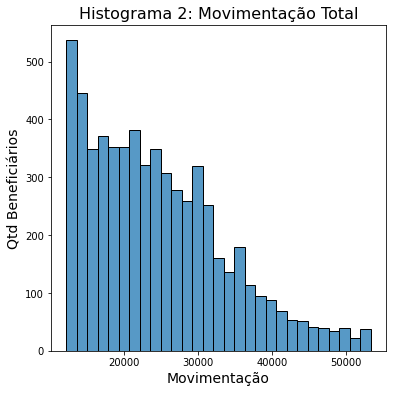

In [137]:
# Histograma 2 - 2o quartil até limite superior do boxplot
# Cálculo do limite superior da movimentação
quartil_1 = bpc.quantile(q=0.25)
quartil_2 = bpc.quantile(q=0.50)
quartil_3 = bpc.quantile(q=0.75)
limite_superior = quartil_3['total_mov'] + 1.5 * (quartil_3['total_mov'] - quartil_1['total_mov'])
print('Limite superior: ', limite_superior)
q2_s = str(quartil_2['total_mov'])
limsup_s = str(limite_superior)
filtro_query = 'total_mov > ' + q2_s + ' and total_mov <= ' + limsup_s
subbpc = bpc.query(filtro_query)['total_mov']
print('Número de registros: ', subbpc.shape[0])
rcParams['figure.figsize'] = 6,6
rcParams['axes.titlesize'] = 16
ax = sns.histplot(x=subbpc)
ax.set_ylabel('Qtd Beneficiários', fontsize=14)
ax.set_xlabel('Movimentação', fontsize=14)
ax.title.set_text('Histograma 2: Movimentação Total')
ax.figure.savefig('sample_data/hist_total_mov_2.png')

**Histograma 3**

Limite superior:  53484.6
Número de registros:  814


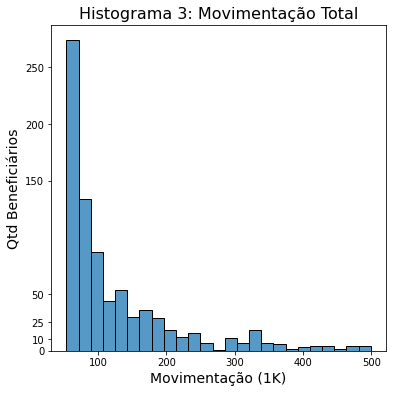

In [138]:
# Histograma 3 - do limite superior de BoxPlot até 500.000,00
# Cálculo do limite superior da movimentação
quartil_1 = bpc.quantile(q=0.25)
quartil_3 = bpc.quantile(q=0.75)
limite_superior = quartil_3['total_mov'] + 1.5 * (quartil_3['total_mov'] - quartil_1['total_mov'])
print('Limite superior: ', limite_superior)
q2_s = str(quartil_2['total_mov'])
limsup_s = str(limite_superior)
filtro_query = 'total_mov > ' + limsup_s + ' and total_mov <= 500000'
subbpc = bpc.query(filtro_query)['total_mov']
print('Número de registros: ', subbpc.shape[0])
rcParams['figure.figsize'] = 6,6
rcParams['axes.titlesize'] = 16
plt.yticks([0, 10, 25, 50, 150, 200, 250, 300])
ax = sns.histplot(x=subbpc/1000)
ax.set_ylabel('Qtd Beneficiários', fontsize=14)
ax.set_xlabel('Movimentação (1K)', fontsize=14)
ax.title.set_text('Histograma 3: Movimentação Total')
ax.figure.savefig('sample_data/hist_total_mov_3.png')

**Histograma 4**

Valor máximo de distribuição: R$ 8445249.80
Número de registros  65


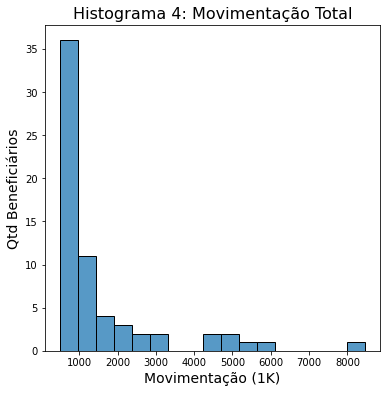

In [139]:
# Histograma 4 - de 500.000,01 até valor máximo

filtro_query = 'total_mov > 500000'
subbpc = bpc.query(filtro_query)['total_mov']
print('Valor máximo de distribuição: R$', format(subbpc.max(), '.2f'))
print('Número de registros ', subbpc.shape[0])
rcParams['figure.figsize'] = 6,6
rcParams['axes.titlesize'] = 16
ax = sns.histplot(x=subbpc/1000)
ax.set_ylabel('Qtd Beneficiários', fontsize=14)
ax.set_xlabel('Movimentação (1K)', fontsize=14)
ax.title.set_text('Histograma 4: Movimentação Total')
ax.figure.savefig('sample_data/hist_total_mov_4.png')